In [1]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / h # 전방 차분

In [2]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h) # 중심 차분

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

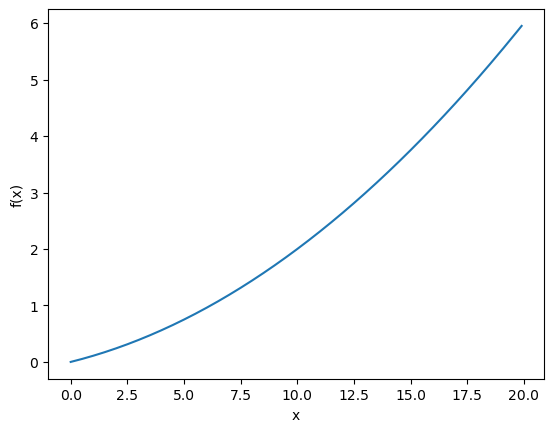

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [5]:
numerical_diff(function_1, 5)

0.1999999999990898

In [6]:
numerical_diff(function_1, 10)

0.2999999999986347

In [10]:
def function_2(x, a, b, c):
    return a*(x - b) + c

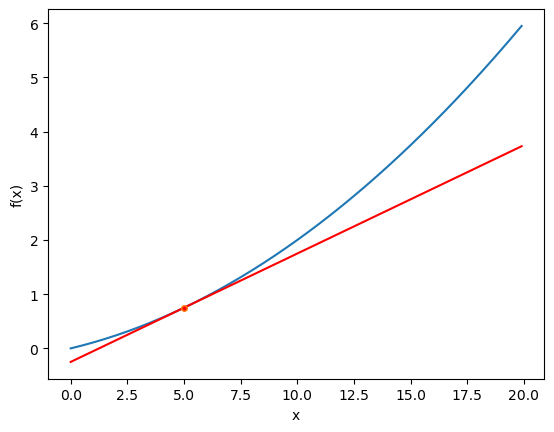

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.plot(x, function_2(x, numerical_diff(function_1, 5), 5, function_1(5)), color='red')

plt.plot(5, function_1(5),
         marker='o',
         linestyle='None',
         markersize=4,
         markerfacecolor='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 편미분

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [22]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [23]:
def function_tmp2(x1):
    return 3.0 ** 2 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        # f(x+h) 계산
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [29]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# 경사 하강법

In [30]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [33]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100))

[-2.58983747e+13 -1.29524862e+12]


In [34]:
# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]


# 신경망에서의 기울기

In [36]:
def softmax(a):
    c = np.max(a)  # 오버플로 대책
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t):
    delta = 1e-7 # 0을 입력하면 -inf가 되기 때문에 이를 방지함.
    return -np.sum(t * np.log(y + delta))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [37]:
net = simpleNet()
print(net.W)

[[-1.00504905 -0.55592262 -0.67042717]
 [ 0.68856637 -0.00954388 -0.18794647]]


In [39]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[ 0.01668031 -0.34214306 -0.57140813]
0


In [41]:
t = np.array([0, 0, 1])
print(net.loss(x, t))

1.4007437119690032


In [43]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.26620683  0.18594486 -0.4521517 ]
 [ 0.39931025  0.2789173  -0.67822754]]
